# Pipeline en español con Spacy



watermark nos da la informacion de las librerias con las que trabajamos.

In [215]:
!pip install spacy watermark -q

In [283]:
!python -m spacy download es_core_news_lg -q # # Descargar el modelo de spaCy en español

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 531.6 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [217]:
import spacy
from spacy import displacy

In [218]:
# Pipeline de spacy

# cargar el modelo

nlp =spacy.load("es_core_news_lg")
import es_core_news_lg
nlp = es_core_news_lg.load()

In [219]:
texto_ejemplo = "Reyes Católicos fue la denominación que recibieron los esposos Isabel I de Castilla (1451-1504) y Fernando II de Aragón (1452-1516), monarcas de la Corona de Castilla y de la Corona de Aragón, respectivamente, cuyo matrimonio implicó la unión dinástica de sus reinos y marcó el inicio de la formación territorial de España. Asimismo, Isabel y Fernando fueron los primeros monarcas de Castilla y Aragón en ser llamados «reyes de España»."

In [220]:
# procesar el texto

doc = nlp(texto_ejemplo) #tokenizacion

In [221]:
tokens = [token.text for token in doc]
print(tokens)

['Reyes', 'Católicos', 'fue', 'la', 'denominación', 'que', 'recibieron', 'los', 'esposos', 'Isabel', 'I', 'de', 'Castilla', '(', '1451-1504', ')', 'y', 'Fernando', 'II', 'de', 'Aragón', '(', '1452-1516', ')', ',', 'monarcas', 'de', 'la', 'Corona', 'de', 'Castilla', 'y', 'de', 'la', 'Corona', 'de', 'Aragón', ',', 'respectivamente', ',', 'cuyo', 'matrimonio', 'implicó', 'la', 'unión', 'dinástica', 'de', 'sus', 'reinos', 'y', 'marcó', 'el', 'inicio', 'de', 'la', 'formación', 'territorial', 'de', 'España', '.', 'Asimismo', ',', 'Isabel', 'y', 'Fernando', 'fueron', 'los', 'primeros', 'monarcas', 'de', 'Castilla', 'y', 'Aragón', 'en', 'ser', 'llamados', '«', 'reyes', 'de', 'España', '»', '.']


In [222]:
# Lematizacion: forma base (raiz) de cada token
for token in doc:
  #ignoramos puntuacion y espacios para mayor claridad
  if not token.is_punct and not token.is_space:
    print(f"{token.text}, {token.lemma_}")

Reyes, Reyes
Católicos, Católicos
fue, ser
la, el
denominación, denominación
que, que
recibieron, recibir
los, el
esposos, esposo
Isabel, Isabel
I, I
de, de
Castilla, Castilla
1451-1504, 1451-1504
y, y
Fernando, Fernando
II, II
de, de
Aragón, Aragón
1452-1516, 1452-1516
monarcas, monarca
de, de
la, el
Corona, Corona
de, de
Castilla, Castilla
y, y
de, de
la, el
Corona, Corona
de, de
Aragón, Aragón
respectivamente, respectivamente
cuyo, cuyo
matrimonio, matrimonio
implicó, implicar
la, el
unión, unión
dinástica, dinástico
de, de
sus, su
reinos, reino
y, y
marcó, marcar
el, el
inicio, inicio
de, de
la, el
formación, formación
territorial, territorial
de, de
España, España
Asimismo, asimismo
Isabel, Isabel
y, y
Fernando, Fernando
fueron, ser
los, el
primeros, primero
monarcas, monarca
de, de
Castilla, Castilla
y, y
Aragón, Aragón
en, en
ser, ser
llamados, llamar
reyes, rey
de, de
España, España


In [223]:
# Etiquetado gramatical
for token in doc:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'Reyes' -> PROPN (proper noun) -> PROPN
'Católicos' -> PROPN (proper noun) -> PROPN
'fue' -> AUX (auxiliary) -> AUX
'la' -> DET (determiner) -> DET
'denominación' -> NOUN (noun) -> NOUN
'que' -> PRON (pronoun) -> PRON
'recibieron' -> VERB (verb) -> VERB
'los' -> DET (determiner) -> DET
'esposos' -> NOUN (noun) -> NOUN
'Isabel' -> PROPN (proper noun) -> PROPN
'I' -> CCONJ (coordinating conjunction) -> CCONJ
'de' -> ADP (adposition) -> ADP
'Castilla' -> PROPN (proper noun) -> PROPN
'(' -> PUNCT (punctuation) -> PUNCT
'1451-1504' -> NUM (numeral) -> NUM
')' -> PUNCT (punctuation) -> PUNCT
'y' -> CCONJ (coordinating conjunction) -> CCONJ
'Fernando' -> PROPN (proper noun) -> PROPN
'II' -> PROPN (proper noun) -> PROPN
'de' -> ADP (adposition) -> ADP
'Aragón' -> PROPN (proper noun) -> PROPN
'(' -> PUNCT (punctuation) -> PUNCT
'1452-1516' -> PROPN (proper noun) -> PROPN
')' -> PUNCT (punctuation) -> PUNCT
',' -> PUNCT (punctuation) -> PUNCT
'monarcas' -> NOUN (noun) -> NOUN
'de' -> ADP (adposi

In [224]:
# Analisis de dependencia sintactica
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'Reyes' -> nsubj (nominal subject) -> 'denominación'
'Católicos' -> flat (flat multiword expression) -> 'Reyes'
'fue' -> cop (copula) -> 'denominación'
'la' -> det (determiner) -> 'denominación'
'denominación' -> ROOT (root) -> 'denominación'
'que' -> obj (object) -> 'recibieron'
'recibieron' -> acl (clausal modifier of noun (adjectival clause)) -> 'denominación'
'los' -> det (determiner) -> 'esposos'
'esposos' -> nsubj (nominal subject) -> 'recibieron'
'Isabel' -> appos (appositional modifier) -> 'esposos'
'I' -> cc (coordinating conjunction) -> 'Castilla'
'de' -> case (case marking) -> 'Castilla'
'Castilla' -> nsubj (nominal subject) -> 'recibieron'
'(' -> punct (punctuation) -> '1451-1504'
'1451-1504' -> appos (appositional modifier) -> 'Castilla'
')' -> punct (punctuation) -> '1451-1504'
'y' -> cc (coordinating conjunction) -> 'Fernando'
'Fernando' -> conj (conjunct) -> 'Castilla'
'II' -> flat (flat multiword expression) -> 'Fernando'
'de' -> case (case marking) -> 'Aragón'
'Aragón

In [225]:
displacy.render(doc, style ="dep", jupyter=True, options={"distance": 120})

In [226]:
# Entidades nombradas

if doc.ents:
  print("Entidades encontradas:")
  print("texto de la entidad ... Etiqueta (tipo)")
  for ent in doc.ents:
    print(f"{ent.text} --- {ent.label_} --- {spacy.explain(ent.label_)}")
else:
  print("No se encontraron entidades nombradas")

Entidades encontradas:
texto de la entidad ... Etiqueta (tipo)
Reyes Católicos --- PER --- Named person or family.
Isabel I de Castilla --- PER --- Named person or family.
Fernando II de Aragón --- PER --- Named person or family.
Corona de Castilla --- PER --- Named person or family.
Corona de Aragón --- PER --- Named person or family.
España --- LOC --- Non-GPE locations, mountain ranges, bodies of water
Isabel --- PER --- Named person or family.
Fernando --- PER --- Named person or family.
Castilla y --- LOC --- Non-GPE locations, mountain ranges, bodies of water
Aragón --- LOC --- Non-GPE locations, mountain ranges, bodies of water
España --- LOC --- Non-GPE locations, mountain ranges, bodies of water


In [227]:
displacy.render(doc, style="ent", jupyter=True, options={"distance": 200})

# Ejemplo practico

In [228]:
from collections import Counter

In [229]:
texto = "Isabel accedió al trono castellano en 1474 al autoproclamarse reina tras la muerte de su hermano el rey Enrique IV de Castilla y con ello provocar una guerra de sucesión (1475-1479) contra los partidarios de la princesa Juana, hija del rey Enrique. En 1479 Fernando heredó el trono de Aragón al morir su padre, el rey Juan II de Aragón. Isabel y Fernando reinaron juntos hasta la muerte de ella en 1504. Entonces Fernando quedó únicamente como rey de la Corona de Aragón, pasando Castilla a su hija Juana y al marido de esta, Felipe de Habsburgo. Sin embargo, Fernando no renunció a controlar Castilla: tras morir Felipe en 1506, Juana fue declarada incapaz, y Fernando consiguió ser nombrado regente del reino hasta su muerte en 1516."

In [230]:
print(f"""{texto[:150]}...""") #muestra un fragmento

Isabel accedió al trono castellano en 1474 al autoproclamarse reina tras la muerte de su hermano el rey Enrique IV de Castilla y con ello provocar una...


In [231]:
doc = nlp(texto)
print("!texto procesado!")

!texto procesado!


In [232]:
palabras_clave = []

In [233]:
for token in doc:
  if token.is_alpha and not token.is_stop:
    #normalizacion: obtener lema y convertir en minusculas
    palabras_clave.append(token.lemma_.lower())

print(f"se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words)")



se extrajeron 63 palabras clave (lemas, sin stop words)


In [234]:
frecuencia_palabras = Counter(palabras_clave)

In [235]:
N = 15
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [236]:
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}' : {frecuencia}")

- 'fernando' : 5
- 'rey' : 4
- 'muerte' : 3
- 'castilla' : 3
- 'juana' : 3
- 'aragón' : 3
- 'isabel' : 2
- 'trono' : 2
- 'enrique' : 2
- 'hija' : 2
- 'morir' : 2
- 'felipe' : 2
- 'acceder' : 1
- 'castellano' : 1
- 'autoproclamar él' : 1


In [237]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [238]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Paleta de colores
    max_words=50,      # Mostrar máximo 50 palabras
    stopwords=None,    # Ya filtramos stop words antes
    collocations=False # Evitar que agrupe palabras (ej. "dióxido carbono")
                       # Si se quisiera, sería mejor hacerlo antes con Spacy/N-gramas
).generate_from_frequencies(frecuencia_palabras) # <-- Usar las frecuencias calculadas

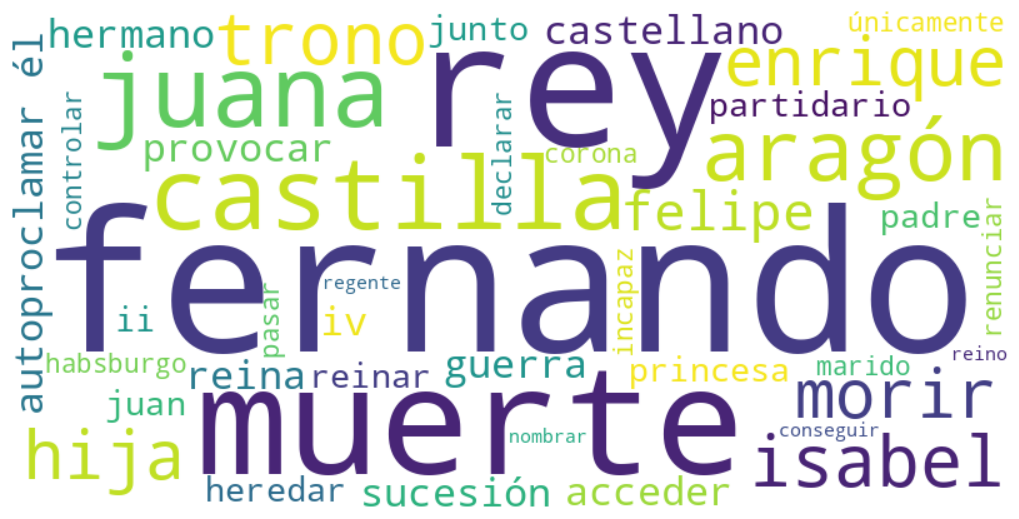

In [239]:
plt.figure(figsize=(10, 5)) # Tamaño de la figura donde se mostrará
plt.imshow(wordcloud_generator, interpolation='bilinear') # Mostrar la imagen generada
plt.axis("off") # No mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # <-- ¡Mostrar la ventana con la nube!

# Consigna 1


Hacer un webscraping de una pagina simple.
limpiar texto y convertir en objeto spacy.
nube de palabras.

In [240]:
!pip install requests #requests, se usa para hacer solicitudes HTTP y obtener el contenido de una página web.

In [241]:
import requests

In [242]:
from bs4 import BeautifulSoup #BeautifulSoup: para analizar el HTML de la página.

In [243]:
url = "https://www.perfil.com/noticias/reperfilar/una-mujer-cuadriplejica-volvio-a-hablar-tras-18-anos-gracias-a-la-inteligencia-artificial.phtml"

In [244]:
contenido = requests.get(url).text #Se usa requests.get(url) para obtener el contenido HTML de la página y se guarda en la variable contenido. .text extrae el contenido como texto.

In [282]:
##print(contenido)

In [246]:
soup = BeautifulSoup(contenido, "html.parser") # parsear es analizar una cadena de texto para identificar su estructura sintáctica.

In [247]:
#Encontrar el contenido del artículo principal
articulo_principal = soup.find(id='article-content')

In [248]:
# Extraer el texto del artículo principal
if articulo_principal:
    texto_articulo = articulo_principal.get_text(strip=True)
    print(texto_articulo)
else:
    print("No se encontró el artículo principal.")

Ann, una mujer de 47 años con cuadriplejía, logró hablar nuevamente luego de 18 años gracias a una neuroprótesis impulsada porinteligencia artificial (IA),en uno de los avances más significativos en el campo de lasinterfaces cerebro-computadora. El procedimiento, desarrollado por investigadores de la Universidad de California en Berkeley y San Francisco, se publicó en larevista científicaNature Neurosciencey representa un gran paso hacia la recuperación de la comunicación para personas con parálisis severa.El dispositivo que hizo posibleeste hito consiste en una lámina delgada con 253 electrodos, implantada sobre la corteza cerebral de Ann.Esta neuroprótesis registró su actividad neuronal y envió las señales a una computadora, que transformó sus pensamientos en palabras audibles con una voz artificial personalizada. Para reconstruir su tono original, los investigadores utilizaron grabaciones de un video de su boda, antes de que Annsufriera un accidente cerebrovascular (ACV) a los 30 añ

In [249]:
from collections import Counter #Counter: para contar la frecuencia de palabras.

In [250]:
parrafos = str(soup.find_all("p"))

In [251]:
print(parrafos)

[<p><strong>Ann, una mujer de 47 años con cuadriplejía, logró hablar nuevamente luego de 18 años gracias a una neuroprótesis impulsada por <a href="https://www.perfil.com/noticias/canal-e/di-domenica-argentina-necesita-una-politica-integral-nacional-que-plantee-una-estrategia-a-mediano-y-largo-plazo.phtml" target="_blank">inteligencia artificial (IA)</a>,</strong> en uno de los avances más significativos en el campo de las <a href="https://www.perfil.com/noticias/opinion/argentina-podria-ser-una-potencia-en-inteligencia-artificial-pero-falta-algo.phtml" target="_blank">interfaces cerebro-computadora</a>. El procedimiento, desarrollado por investigadores de la Universidad de California en Berkeley y San Francisco, se publicó en la <strong>revista científica <em>Nature Neuroscience</em> y representa un gran paso hacia la recuperación de la comunicación para personas con parálisis severa.</strong></p>, <p>El dispositivo que hizo posible <strong>este hito consiste en una lámina delgada con

In [252]:
print(parrafos.count("inteligencia"))

3


In [253]:
def buscar_palabra(palabra): # Se define una función buscar_palabra que toma una palabra como entrada, la busca en el HTML (en minúsculas) y muestra cuántas veces aparece.
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [254]:
buscar_palabra("inteligencia")

Encontraste la palabra 'inteligencia' 45 veces


In [255]:
from wordcloud import WordCloud # Se importan las bibliotecas necesarias para generar la nube de palabras, incluyendo `wordcloud`, `nltk` para el procesamiento de lenguaje natural, y `matplotlib` para la visualización.
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [256]:
import matplotlib.pyplot as plt

In [257]:
# Descarga corpus de stopwords en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [258]:
#funcion para limpiar texto
def limpiar_texto(texto):
  palabra_a_eliminar= ['dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á', 'ó','si','oh','allí','cuanto','cerca','parece','ay','p','quien','sido','dice','quién','dio','se','tan']

#Anexa las palabras que queremos eliminar a la lista de Stopwords
  black_list = stopwords_es.union(palabra_a_eliminar)
  texto_minuscula = texto.lower()
  texto_limpio = re.sub(r'[^\w\s]', '', texto_minuscula)
  palabras = texto_limpio.split()
  palabras_importantes =[]
  for palabra in palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)
  return(palabras_importantes)

texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

In [259]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

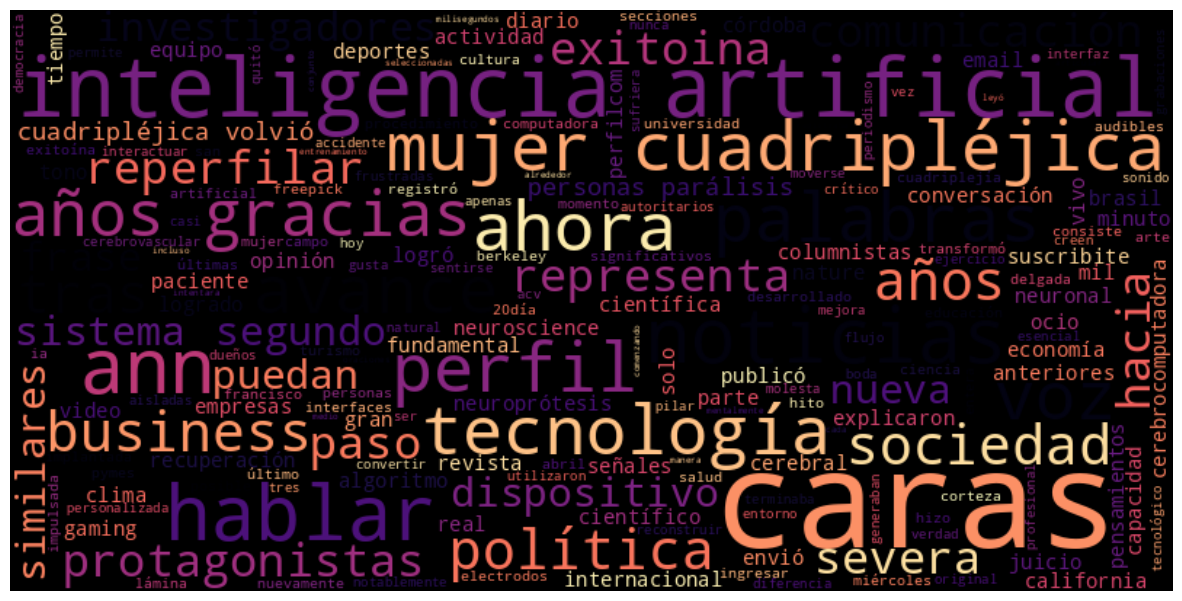

In [260]:
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap = "magma").generate(texto_limpio)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Procesamiento con Spacy

- Se carga el modelo de spaCy en español.
- Se procesa el texto limpio con spaCy.
- Se realizan tareas como tokenización, lematización, análisis sintáctico y detección de entidades nombradas.

In [261]:
#cargo el modelo
nlp =spacy.load("es_core_news_lg")
import es_core_news_lg
nlp = es_core_news_lg.load()

In [262]:
doc = nlp(texto_limpio) #tokenizacion

In [263]:
tokens = [token.text for token in doc]
print(tokens)

['mujer', 'cuadripléjica', 'volvió', 'hablar', 'tras', '18', 'años', 'gracias', 'inteligencia', 'artificial', 'perfil', 'miércoles', '23', 'abril', '2025', 'business', 'noticias', 'caras', 'exitoína', 'perfil', 'brasil', 'últimas', 'noticias', 'política', 'opinión', 'sociedad', 'ingresar', 'suscribite', '20día', 'último', 'momento', 'secciones', 'ahora', 'columnistas', 'opinión', 'política', 'economía', 'pymes', 'sociedad', 'salud', 'ciencia', 'protagonistas', 'tecnología', 'cultura', 'arte', 'educación', 'internacional', 'clima', 'deportes', 'ocio', 'caras', 'exitoina', 'turismo', 'videos', 'córdoba', 'reperfilar', 'business', 'empresas', 'protagonistas', 'noticias', 'caras', 'exitoina', 'gaming', 'vivo', 'diario', 'juicio', 'reperfilar', 'avance', 'científico', 'mujer', 'cuadripléjica', 'volvió', 'hablar', 'tras', '18', 'años', 'gracias', 'inteligencia', 'artificial', 'publicó', 'revista', 'científica', 'nature', 'neuroscience', 'representa', 'gran', 'paso', 'hacia', 'recuperación', 

In [264]:
# Lematizacion: forma base (raiz) de cada token
for token in doc:
  #ignoramos puntuacion y espacios para mayor claridad
  if not token.is_punct and not token.is_space:
    print(f"{token.text}, {token.lemma_}")

mujer, mujer
cuadripléjica, cuadripléjico
volvió, volver
hablar, hablar
tras, tras
18, 18
años, año
gracias, gracias
inteligencia, inteligencia
artificial, artificial
perfil, perfil
miércoles, miércoles
23, 23
abril, abril
2025, 2025
business, business
noticias, noticia
caras, caro
exitoína, exitoíno
perfil, perfil
brasil, brasil
últimas, último
noticias, noticia
política, político
opinión, opinión
sociedad, sociedad
ingresar, ingresar
suscribite, suscribite
20día, 20día
último, último
momento, momento
secciones, sección
ahora, ahora
columnistas, columnista
opinión, opinión
política, político
economía, economío
pymes, pym
sociedad, sociedad
salud, salud
ciencia, ciencia
protagonistas, protagonista
tecnología, tecnologío
cultura, cultura
arte, arte
educación, educación
internacional, internacional
clima, clima
deportes, deportes
ocio, ocio
caras, cara
exitoina, exitoín
turismo, turismo
videos, videos
córdoba, córdoba
reperfilar, reperfilar
business, business
empresas, empresa
protagonis

In [265]:
# Etiquetado gramatical
for token in doc:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'mujer' -> NOUN (noun) -> NOUN
'cuadripléjica' -> ADJ (adjective) -> ADJ
'volvió' -> VERB (verb) -> VERB
'hablar' -> VERB (verb) -> VERB
'tras' -> ADP (adposition) -> ADP
'18' -> NUM (numeral) -> NUM
'años' -> NOUN (noun) -> NOUN
'gracias' -> ADP (adposition) -> ADP
'inteligencia' -> NOUN (noun) -> NOUN
'artificial' -> ADJ (adjective) -> ADJ
'perfil' -> NOUN (noun) -> NOUN
'miércoles' -> NOUN (noun) -> NOUN
'23' -> NUM (numeral) -> NUM
'abril' -> NOUN (noun) -> NOUN
'2025' -> NUM (numeral) -> NUM
'business' -> NOUN (noun) -> NOUN
'noticias' -> NOUN (noun) -> NOUN
'caras' -> ADJ (adjective) -> ADJ
'exitoína' -> ADJ (adjective) -> ADJ
'perfil' -> PROPN (proper noun) -> PROPN
'brasil' -> PROPN (proper noun) -> PROPN
'últimas' -> ADJ (adjective) -> ADJ
'noticias' -> NOUN (noun) -> NOUN
'política' -> ADJ (adjective) -> ADJ
'opinión' -> NOUN (noun) -> NOUN
'sociedad' -> NOUN (noun) -> NOUN
'ingresar' -> VERB (verb) -> VERB
'suscribite' -> ADV (adverb) -> ADV
'20día' -> NUM (numeral) -> NUM
'

In [266]:
print(doc)

mujer cuadripléjica volvió hablar tras 18 años gracias inteligencia artificial perfil miércoles 23 abril 2025 business noticias caras exitoína perfil brasil últimas noticias política opinión sociedad ingresar suscribite 20día último momento secciones ahora columnistas opinión política economía pymes sociedad salud ciencia protagonistas tecnología cultura arte educación internacional clima deportes ocio caras exitoina turismo videos córdoba reperfilar business empresas protagonistas noticias caras exitoina gaming vivo diario juicio reperfilar avance científico mujer cuadripléjica volvió hablar tras 18 años gracias inteligencia artificial publicó revista científica nature neuroscience representa gran paso hacia recuperación comunicación personas parálisis severa mujer cuadripléjica volvió hablar tras 18 años gracias inteligencia artificial freepick 02042025 1105 ann mujer 47 años cuadriplejía logró hablar nuevamente 18 años gracias neuroprótesis impulsada inteligencia artificial ia avanc

In [267]:
# Etiquetado gramatical
for token in doc:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'mujer' -> NOUN (noun) -> NOUN
'cuadripléjica' -> ADJ (adjective) -> ADJ
'volvió' -> VERB (verb) -> VERB
'hablar' -> VERB (verb) -> VERB
'tras' -> ADP (adposition) -> ADP
'18' -> NUM (numeral) -> NUM
'años' -> NOUN (noun) -> NOUN
'gracias' -> ADP (adposition) -> ADP
'inteligencia' -> NOUN (noun) -> NOUN
'artificial' -> ADJ (adjective) -> ADJ
'perfil' -> NOUN (noun) -> NOUN
'miércoles' -> NOUN (noun) -> NOUN
'23' -> NUM (numeral) -> NUM
'abril' -> NOUN (noun) -> NOUN
'2025' -> NUM (numeral) -> NUM
'business' -> NOUN (noun) -> NOUN
'noticias' -> NOUN (noun) -> NOUN
'caras' -> ADJ (adjective) -> ADJ
'exitoína' -> ADJ (adjective) -> ADJ
'perfil' -> PROPN (proper noun) -> PROPN
'brasil' -> PROPN (proper noun) -> PROPN
'últimas' -> ADJ (adjective) -> ADJ
'noticias' -> NOUN (noun) -> NOUN
'política' -> ADJ (adjective) -> ADJ
'opinión' -> NOUN (noun) -> NOUN
'sociedad' -> NOUN (noun) -> NOUN
'ingresar' -> VERB (verb) -> VERB
'suscribite' -> ADV (adverb) -> ADV
'20día' -> NUM (numeral) -> NUM
'

In [268]:
# Analisis de dependencia sintactica
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'mujer' -> nsubj (nominal subject) -> 'volvió'
'cuadripléjica' -> amod (adjectival modifier) -> 'mujer'
'volvió' -> ROOT (root) -> 'volvió'
'hablar' -> xcomp (open clausal complement) -> 'volvió'
'tras' -> case (case marking) -> 'años'
'18' -> nummod (numeric modifier) -> 'años'
'años' -> obl (oblique nominal) -> 'volvió'
'gracias' -> case (case marking) -> 'inteligencia'
'inteligencia' -> obl (oblique nominal) -> 'volvió'
'artificial' -> amod (adjectival modifier) -> 'inteligencia'
'perfil' -> appos (appositional modifier) -> 'inteligencia'
'miércoles' -> appos (appositional modifier) -> 'perfil'
'23' -> compound (compound) -> 'miércoles'
'abril' -> compound (compound) -> 'miércoles'
'2025' -> compound (compound) -> 'miércoles'
'business' -> compound (compound) -> 'miércoles'
'noticias' -> obj (object) -> 'hablar'
'caras' -> amod (adjectival modifier) -> 'noticias'
'exitoína' -> xcomp (open clausal complement) -> 'volvió'
'perfil' -> obj (object) -> 'exitoína'
'brasil' -> appos (appos

In [281]:
texto_filtrado = " ".join(palabras_importantes[:20])  # Convertir palabras clave en una oración procesable
doc_filtrado = nlp(texto_filtrado)  # Procesar con el modelo de spaCy

displacy.render(doc_filtrado, style="dep", jupyter=True, options={"distance":150})

In [270]:
# Entidades nombradas

if doc.ents:
  print("Entidades encontradas:")
  print("texto de la entidad ... Etiqueta (tipo)")
  for ent in doc.ents:
    print(f"{ent.text} --- {ent.label_} --- {spacy.explain(ent.label_)}")
else:
  print("No se encontraron entidades nombradas")

Entidades encontradas:
texto de la entidad ... Etiqueta (tipo)
brasil --- LOC --- Non-GPE locations, mountain ranges, bodies of water
córdoba --- LOC --- Non-GPE locations, mountain ranges, bodies of water
nature neuroscience --- PER --- Named person or family.
freepick --- MISC --- Miscellaneous entities, e.g. events, nationalities, products or works of art
cuadriplejía --- PER --- Named person or family.
california --- LOC --- Non-GPE locations, mountain ranges, bodies of water
san francisco --- PER --- Named person or family.
nature neuroscience --- PER --- Named person or family.
ann neuroprótesis --- PER --- Named person or family.
ann --- PER --- Named person or family.
ann --- MISC --- Miscellaneous entities, e.g. events, nationalities, products or works of art
alexa --- PER --- Named person or family.
mendoza --- LOC --- Non-GPE locations, mountain ranges, bodies of water
ferrari fórmula --- PER --- Named person or family.
michael schumacher --- PER --- Named person or family.


In [271]:
displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

In [272]:
palabras_clave = []

In [273]:
for token in doc:
    if token.is_alpha and not token.is_stop:
      # Normalización: Obtener lema y convertir a minúsculas
      palabras_clave.append(token.lemma_.lower())

print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")
# Ejemplo de las primeras palabras extraídas:
print(f"Ejemplo: {palabras_clave[:15]}")

Se extrajeron 446 palabras clave (lemas, sin stop words).
Ejemplo: ['mujer', 'cuadripléjico', 'volver', 'hablar', 'año', 'gracias', 'inteligencia', 'artificial', 'perfil', 'miércoles', 'abril', 'business', 'noticia', 'caro', 'exitoíno']


In [274]:
frecuencia_palabras = Counter(palabras_clave)

In [275]:
N = 15
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [276]:
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}' : {frecuencia}")

- 'año' : 7
- 'artificial' : 7
- 'inteligencia' : 6
- 'mujer' : 5
- 'hablar' : 5
- 'noticia' : 5
- 'ann' : 5
- 'cuadripléjico' : 4
- 'gracias' : 4
- 'perfil' : 4
- 'avance' : 4
- 'científico' : 4
- 'persona' : 4
- 'palabra' : 4
- 'voz' : 4


In [277]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Paleta de colores
    max_words=50,      # Mostrar máximo 50 palabras
    stopwords=None,    # Ya filtramos stop words antes
    collocations=False # Evitar que agrupe palabras (ej. "dióxido carbono")
                       # Si se quisiera, sería mejor hacerlo antes con Spacy/N-gramas
).generate_from_frequencies(frecuencia_palabras) # <-- Usar las frecuencias calculadas

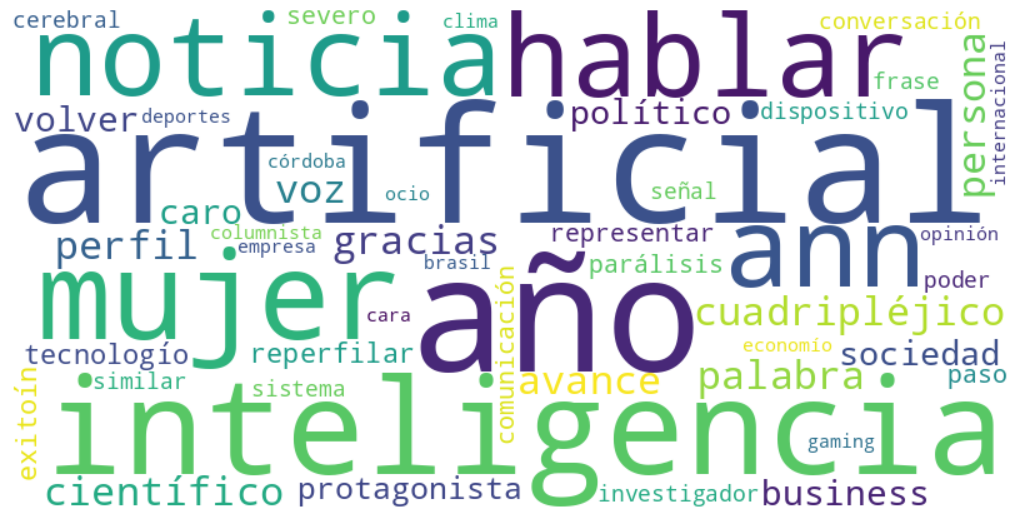

In [278]:
plt.figure(figsize=(10, 5)) # Tamaño de la figura donde se mostrará
plt.imshow(wordcloud_generator, interpolation='bilinear') # Mostrar la imagen generada
plt.axis("off") # No mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # <-- ¡Mostrar la ventana con la nube!